# Install Required Libraries and Frameworks

In [2]:
!pip install tensorflow keras numpy matplotlib scikit-learn gdown

import os
import zipfile
import numpy as np
import tensorflow as tf
import gdown
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import ImageFile
import torch.optim as optim
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Download the dataset from Google Drive

In [3]:
# URL of the file on Google Drive
url = "https://drive.google.com/uc?id=1aC-IzwsGBoY9fgTowL8I8cIQUIeFa-Sr"

# Name of the output file
output = "breast_cancer_dataset.zip"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1aC-IzwsGBoY9fgTowL8I8cIQUIeFa-Sr
From (redirected): https://drive.google.com/uc?id=1aC-IzwsGBoY9fgTowL8I8cIQUIeFa-Sr&confirm=t&uuid=731486c7-1c45-4325-a40d-b1556a1b3cce
To: /content/breast_cancer_dataset.zip
100%|██████████| 1.56G/1.56G [00:30<00:00, 50.7MB/s]


'breast_cancer_dataset.zip'

# Unzip the dataset

In [4]:
# Extract files from the ZIP archive to the specified directory
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("breast_cancer_dataset")


# Load Images and Labels

In [5]:
# Enable PIL to load truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_images_and_labels(data_dir):
    """Load images and their labels from subdirectories."""

    images, labels = [], []
    class_names = ['Not_Malign', 'Malign']  # Define the class names in order

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                if os.path.isfile(img_path):
                    try:
                        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
                        img_array = tf.keras.preprocessing.image.img_to_array(img)
                        images.append(img_array)
                        labels.append(label)  # Assign label (0 for 'Not_Malign', 1 for 'Malign')
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
                        continue
    return np.array(images), np.array(labels)

data_dir = 'breast_cancer_dataset/CombinedImages'
images, labels = load_images_and_labels(data_dir)
images = images / 255.0  # Normalize pixel values
labels = to_categorical(labels, num_classes=2) # Convert labels to categorical format

# Split the Data


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Output shapes of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1705, 128, 128, 3)
Testing data shape: (427, 128, 128, 3)


# Display Images

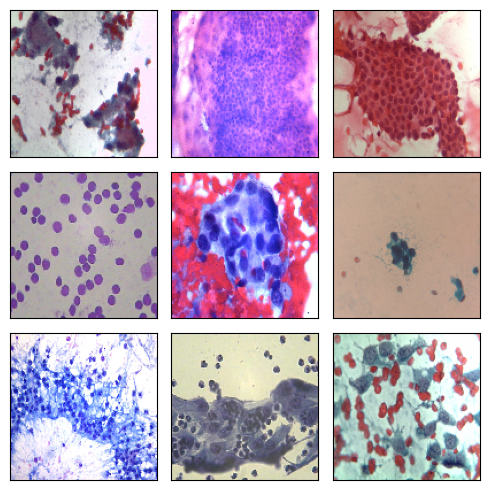

In [7]:
def display_random_images(images, num_images=3, figsize=(5, 5)):
     # Randomly select image indices
    idx = np.random.randint(0, images.shape[0], (num_images, num_images))
     # Create subplot grid
    _, ax = plt.subplots(num_images, num_images, figsize=figsize)

    for row in range(num_images):
        for column in range(num_images):
            # Display images
            ax[row][column].imshow(images[idx[row][column]], 'gray')
            ax[row][column].set_xticks([])
            ax[row][column].set_yticks([])

    plt.tight_layout()
    plt.show()

display_random_images(images)


# Apply a single 2D CONV layer to your image
Options:
<br>
(a) Without padding
<br>
(b) Add padding to keep same size





Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)
Size of Feature Map is (128,)


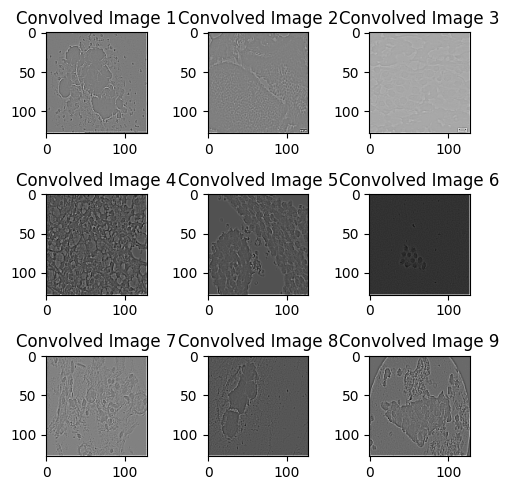

In [8]:
# Convert image data to tensor and rearrange dimensions
data_tensor = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)  # Shape: (batch_size, channels, height, width)

# Define an edge detection kernel for 3 channels
kernel = torch.tensor([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],  # Channel 1
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],  # Channel 2
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]   # Channel 3
], dtype=torch.float32).unsqueeze(0)  # Shape: (1, 3, 3, 3)

# Apply the convolution operation
def apply_convolution(data_tensor, kernel):
    with torch.no_grad():
        convolved_data = F.conv2d(data_tensor, kernel, padding=1)  # Padding to keep output size same as input
    return convolved_data

convolved_data = apply_convolution(data_tensor, kernel)

# Display convolved images
fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # 3x3 grid for images
for i, ax in enumerate(axes.flatten()):
    ax.imshow(convolved_data[i].squeeze().numpy(), cmap='gray')  # Show image
    ax.set_title(f'Convolved Image {i+1}')  # Title for each subplot
    print("Size of Feature Map is {}".format(convolved_data[i].squeeze().numpy().shape[1:]))  # Print size
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


Options:
<br>
(a) With stride 1
<br>
(b) With stride 2

Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)
Size of Feature Map is (146,)


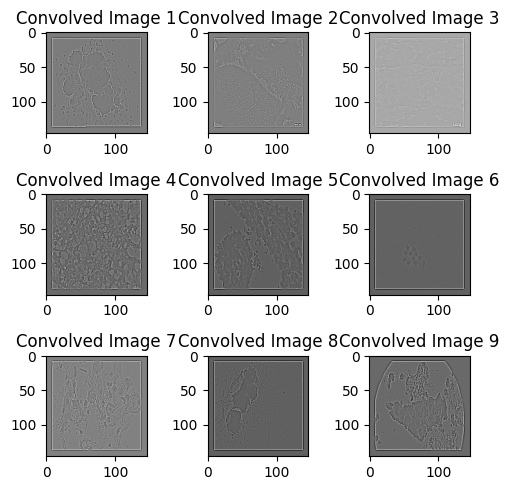

Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)
Size of Feature Map is (73,)


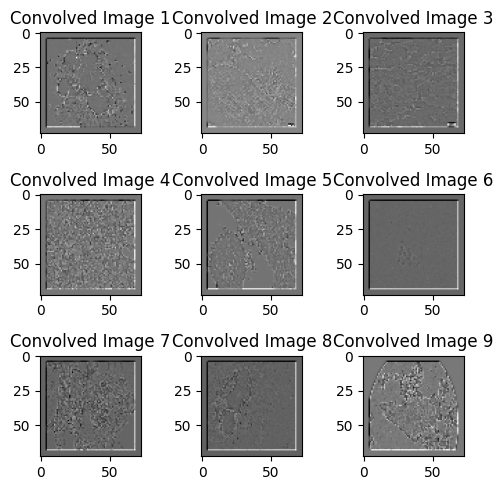

In [9]:
def apply_convolution_stride(data_tensor, kernel, stride):
    with torch.no_grad():
        convolved_data = F.conv2d(data_tensor, kernel, stride=stride,padding=10)  # Adding padding to keep the output size same as input
    return convolved_data

convolved_data1 = apply_convolution_stride(data_tensor, kernel,stride=1)
convolved_data2 = apply_convolution_stride(data_tensor, kernel,stride=2)


# Display all convolved images for visual inspection
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(convolved_data1[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Convolved Image {i+1}')
    print("Size of Feature Map is {}".format(convolved_data1[i].squeeze().numpy().shape[1:]))
plt.tight_layout()
plt.show()

# Display all convolved images for visual inspection
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(convolved_data2[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Convolved Image {i+1}')
    print("Size of Feature Map is {}".format(convolved_data2[i].squeeze().numpy().shape[1:]))
plt.tight_layout()
plt.show()

#Max Pool

Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)


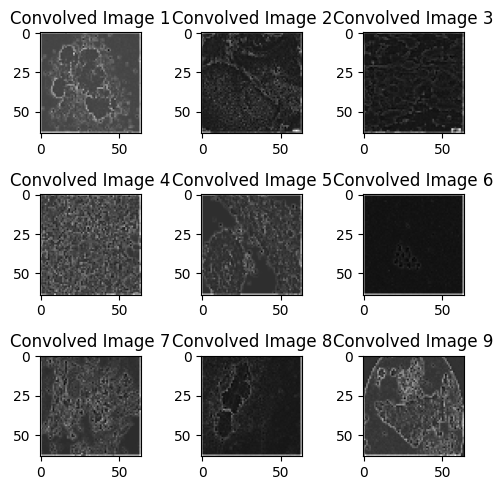

In [10]:
def apply_max_pooling(data_tensor, kernel_size, stride=None, padding=0):
    with torch.no_grad():
        pooled_data = F.max_pool2d(data_tensor, kernel_size, stride, padding)
    return pooled_data

pooled_data = apply_max_pooling(convolved_data, kernel_size=2, stride=2, padding=0)

# Display all convolved images for visual inspection
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pooled_data[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Convolved Image {i+1}')
    print("Size of Feature Map is {}".format(pooled_data[i].squeeze().numpy().shape[1:]))
plt.tight_layout()
plt.show()

# Average Pool

Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)
Size of Feature Map is (64,)


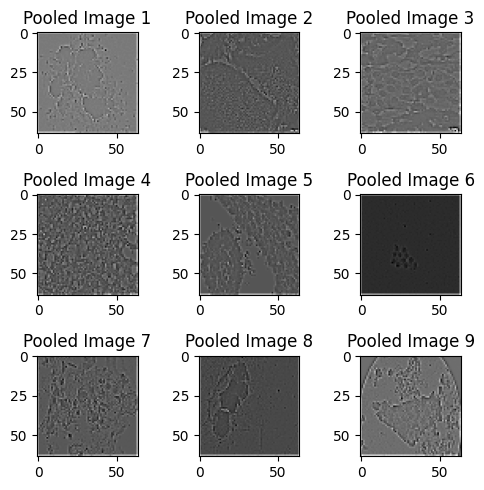

In [11]:
def apply_average_pooling(data_tensor, kernel_size, stride=None, padding=0):
    with torch.no_grad():
        pooled_data = F.avg_pool2d(data_tensor, kernel_size, stride, padding)
    return pooled_data

pooled_data_avg = apply_average_pooling(convolved_data, kernel_size=2, stride=2, padding=0)

# Display all pooled images for visual inspection
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pooled_data_avg[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Pooled Image {i+1}')
    print("Size of Feature Map is {}".format(pooled_data_avg[i].squeeze().numpy().shape[1:]))
plt.tight_layout()
plt.show()

[link text](https://)# Combine everything together
<center><img src="https://developers.google.com/machine-learning/practica/image-classification/images/cnn_architecture.svg?hl=id" alt="drawing" width="1000"/></center>

# Implementation of a Simple CNN for Image Classification

In [12]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Increased filters
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Additional layer
        self.fc1 = nn.Linear(128 * 16 * 16, 64)  # Adjust based on final feature map size
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Load data

In [13]:
# Convert image data to tensors and rearrange dimensions
train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)

# Convert labels to tensors; use np.argmax if labels are one-hot encoded
train_labels_tensor = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(train_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_tensor, test_labels_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Print shapes for debugging
print(f"Train tensor shape: {train_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test tensor shape: {test_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")


Train tensor shape: torch.Size([1705, 3, 128, 128])
Train labels tensor shape: torch.Size([1705])
Test tensor shape: torch.Size([427, 3, 128, 128])
Test labels tensor shape: torch.Size([427])


# Training and Validation of SimpleCNN Model

In [14]:
# Instantiate the model
model = SimpleCNN()  # Use the improved model from previous response

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10  # Adjust as needed
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += targets.size(0)
            correct_val += (predicted == targets).sum().item()

    avg_val_loss = running_val_loss / len(test_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs} - '
          f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - '
          f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')



Epoch 1/10 - Train Loss: 0.7059, Train Accuracy: 58.53% - Val Loss: 0.6782, Val Accuracy: 58.31%
Epoch 2/10 - Train Loss: 0.6733, Train Accuracy: 60.35% - Val Loss: 0.6756, Val Accuracy: 58.78%
Epoch 3/10 - Train Loss: 0.6673, Train Accuracy: 61.64% - Val Loss: 0.6657, Val Accuracy: 60.66%
Epoch 4/10 - Train Loss: 0.6666, Train Accuracy: 60.47% - Val Loss: 0.6581, Val Accuracy: 60.66%
Epoch 5/10 - Train Loss: 0.6610, Train Accuracy: 61.47% - Val Loss: 0.6617, Val Accuracy: 60.89%
Epoch 6/10 - Train Loss: 0.6590, Train Accuracy: 62.52% - Val Loss: 0.6688, Val Accuracy: 59.72%
Epoch 7/10 - Train Loss: 0.6625, Train Accuracy: 61.70% - Val Loss: 0.6652, Val Accuracy: 60.19%
Epoch 8/10 - Train Loss: 0.6630, Train Accuracy: 62.52% - Val Loss: 0.6635, Val Accuracy: 62.53%
Epoch 9/10 - Train Loss: 0.6459, Train Accuracy: 63.28% - Val Loss: 0.6666, Val Accuracy: 61.12%
Epoch 10/10 - Train Loss: 0.6453, Train Accuracy: 63.81% - Val Loss: 0.6530, Val Accuracy: 62.06%


# Plot Accuracy and Loss

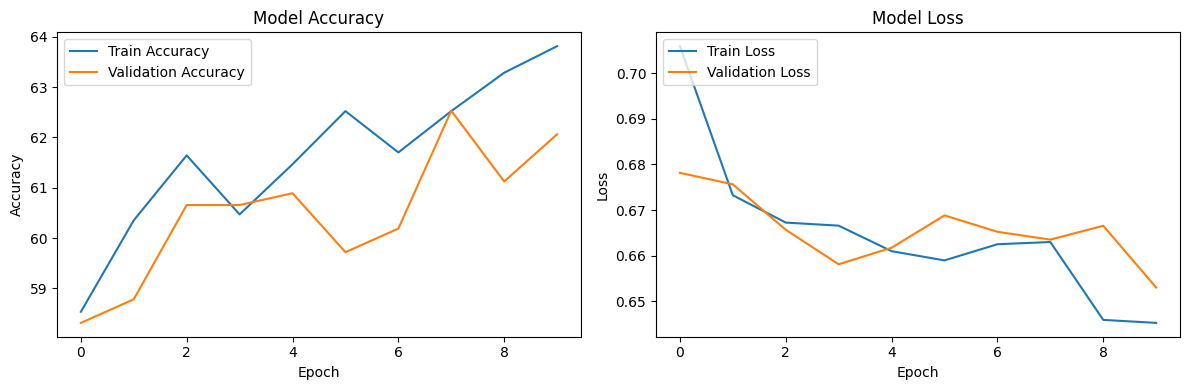

In [15]:
# Plot training history
def plot_training_history(train_accuracies, val_accuracies, train_losses, val_losses):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(train_accuracies, val_accuracies, train_losses, val_losses)


# Save Model

In [16]:
torch.save(model, 'model.pth')
